In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('datasets/usda_food/database.json') as f:
    db = json.load(f)

len(db)

6636

In [3]:
db[0].keys(
    
)

dict_keys(['id', 'description', 'tags', 'manufacturer', 'group', 'portions', 'nutrients'])

In [4]:
nutrients = db[0]['nutrients']

In [5]:
nutrients[1]

{'value': 29.2,
 'units': 'g',
 'description': 'Total lipid (fat)',
 'group': 'Composition'}

In [6]:
df_nutrients = pd.DataFrame(db[0]['nutrients'])
df_nutrients.head()

,value,units,description,group
0,25.18,g,Protein,Composition
1,29.20,g,Total lipid (fat),Composition
2,3.06,g,"Carbohydrate, by difference",Composition
3,3.28,g,Ash,Other
4,376.00,kcal,Energy,Energy


In [7]:
info_keys = ['id', 'description', 'group', 'manufacturer']
info = pd.DataFrame(db, columns=info_keys)
info.head()

,id,description,group,manufacturer
0,1008,"Cheese, caraway",Dairy and Egg Products,
1,1009,"Cheese, cheddar",Dairy and Egg Products,
2,1018,"Cheese, edam",Dairy and Egg Products,
3,1019,"Cheese, feta",Dairy and Egg Products,
4,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,


In [8]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6636 entries, 0 to 6635
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            6636 non-null   int64 
 1   description   6636 non-null   object
 2   group         6636 non-null   object
 3   manufacturer  5195 non-null   object
dtypes: int64(1), object(3)
memory usage: 207.5+ KB


In [9]:
pd.value_counts(info['group'])[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [10]:
info['group'].value_counts()[:10]

Vegetables and Vegetable Products    812
Beef Products                        618
Baked Products                       496
Breakfast Cereals                    403
Legumes and Legume Products          365
Fast Foods                           365
Lamb, Veal, and Game Products        345
Sweets                               341
Fruits and Fruit Juices              328
Pork Products                        328
Name: group, dtype: int64

In [11]:
# all the nutrients
l = []
for record in db:
    nut = pd.DataFrame(record['nutrients'])
    nut['id'] = record['id']
    l.append(nut)

all_nutrients = pd.concat(l, ignore_index=True)

In [12]:
all_nutrients

,value,units,description,group,id
0,25.180,g,Protein,Composition,1008
1,29.200,g,Total lipid (fat),Composition,1008
2,3.060,g,"Carbohydrate, by difference",Composition,1008
3,3.280,g,Ash,Other,1008
4,376.000,kcal,Energy,Energy,1008
...,...,...,...,...,...
389350,0.000,mcg,"Vitamin B-12, added",Vitamins,43546
389351,0.000,mg,Cholesterol,Other,43546
389352,0.072,g,"Fatty acids, total saturated",Other,43546
389353,0.028,g,"Fatty acids, total monounsaturated",Other,43546


In [13]:
# 重复项
all_nutrients.duplicated().sum()

14179

In [14]:
all_nutrients = all_nutrients.drop_duplicates()

In [15]:
ndata = pd.merge(all_nutrients, info, on='id', 
         suffixes=["_nutrient", '_food'])


In [16]:
ndata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 375176 entries, 0 to 375175
Data columns (total 8 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   value                 375176 non-null  float64
 1   units                 375176 non-null  object 
 2   description_nutrient  375176 non-null  object 
 3   group_nutrient        375176 non-null  object 
 4   id                    375176 non-null  int64  
 5   description_food      375176 non-null  object 
 6   group_food            375176 non-null  object 
 7   manufacturer          293054 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 25.8+ MB


In [17]:
ndata.iloc[10000]

value                                                        0.104
units                                                            g
description_nutrient                                      Arginine
group_nutrient                                         Amino Acids
id                                                            3197
description_food        Babyfood, cereal, with egg yolks, strained
group_food                                              Baby Foods
manufacturer                                                      
Name: 10000, dtype: object

In [33]:
# 每种营养物质的中位数  quantile(0.5)
result = ndata.groupby(['description_nutrient', 'group_food'])['value'].median()

In [32]:
ndata[ndata['description_nutrient'].str.contains('Zinc')]

,value,units,description_nutrient,group_nutrient,id,description_food,group_food,manufacturer
14,2.94,mg,"Zinc, Zn",Elements,1008,"Cheese, caraway",Dairy and Egg Products,
75,3.11,mg,"Zinc, Zn",Elements,1009,"Cheese, cheddar",Dairy and Egg Products,
151,3.75,mg,"Zinc, Zn",Elements,1018,"Cheese, edam",Dairy and Egg Products,
222,2.88,mg,"Zinc, Zn",Elements,1019,"Cheese, feta",Dairy and Egg Products,
293,2.76,mg,"Zinc, Zn",Elements,1028,"Cheese, mozzarella, part skim milk",Dairy and Egg Products,
...,...,...,...,...,...,...,...,...
374940,1.83,mg,"Zinc, Zn",Elements,42161,"Bologna, beef, low fat",Sausages and Luncheon Meats,
374991,3.17,mg,"Zinc, Zn",Elements,42173,"Turkey and pork sausage, fresh, bulk, patty or...",Sausages and Luncheon Meats,
375043,0.08,mg,"Zinc, Zn",Elements,43408,"Babyfood, juice, pear",Baby Foods,None
375093,0.26,mg,"Zinc, Zn",Elements,43539,"Babyfood, dessert, banana yogurt, strained",Baby Foods,None


In [34]:
result.head(20)

description_nutrient  group_food                       
Adjusted Protein      Sweets                               12.9000
                      Vegetables and Vegetable Products     2.1800
Alanine               Baby Foods                            0.0850
                      Baked Products                        0.2480
                      Beef Products                         1.5500
                      Beverages                             0.0030
                      Breakfast Cereals                     0.3110
                      Cereal Grains and Pasta               0.3730
                      Dairy and Egg Products                0.2710
                      Ethnic Foods                          1.2900
                      Fast Foods                            0.5140
                      Fats and Oils                         0.0000
                      Finfish and Shellfish Products        1.2180
                      Fruits and Fruit Juices               0.0270
      

In [36]:
result.loc['Zinc, Zn']

group_food
Baby Foods                           0.590
Baked Products                       0.660
Beef Products                        5.390
Beverages                            0.040
Breakfast Cereals                    2.885
Cereal Grains and Pasta              1.090
Dairy and Egg Products               1.390
Ethnic Foods                         1.045
Fast Foods                           1.250
Fats and Oils                        0.020
Finfish and Shellfish Products       0.670
Fruits and Fruit Juices              0.100
Lamb, Veal, and Game Products        3.940
Legumes and Legume Products          1.140
Meals, Entrees, and Sidedishes       0.630
Nut and Seed Products                3.290
Pork Products                        2.320
Poultry Products                     2.500
Restaurant Foods                     0.800
Sausages and Luncheon Meats          2.130
Snacks                               1.470
Soups, Sauces, and Gravies           0.200
Spices and Herbs                     2.750


<Axes: ylabel='group_food'>

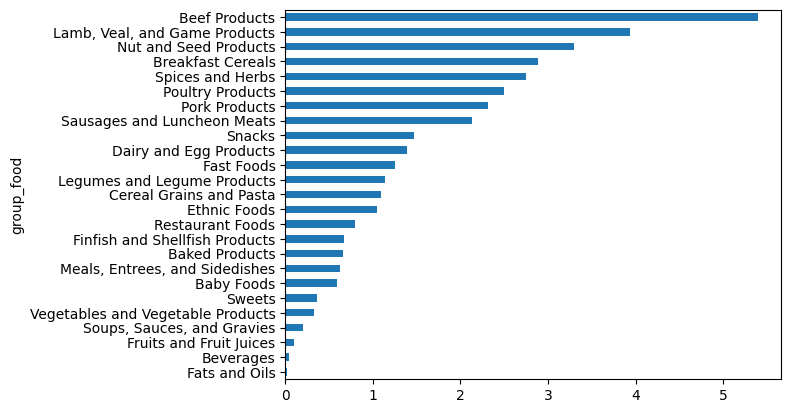

In [38]:
result.loc['Zinc, Zn'].sort_values().plot.barh()

In [40]:
# which food is most dense in each nutrient.



In [56]:
by_nutrient = ndata.groupby(['group_nutrient', 'description_nutrient'])
by_nutrient['value'].max()

group_nutrient  description_nutrient        
Amino Acids     Alanine                            8.009
                Arginine                           7.436
                Aspartic acid                     10.203
                Cystine                            1.307
                Glutamic acid                     17.452
                                                  ...   
Vitamins        Vitamin D2 (ergocalciferol)       28.100
                Vitamin D3 (cholecalciferol)      27.400
                Vitamin E (alpha-tocopherol)     149.400
                Vitamin E, added                  46.550
                Vitamin K (phylloquinone)       1714.500
Name: value, Length: 94, dtype: float64

In [57]:
def get_max(g):
    return g.loc[g['value'].idxmax()]
max_food = by_nutrient.apply(get_max)[['description_food', 'value']]
max_food['description_food'] = max_food['description_food'].str[:50]
max_food.loc['Amino Acids']

,description_food,value
description_nutrient,,
Alanine,"Gelatins, dry powder, unsweetened",8.009
Arginine,"Seeds, sesame flour, low-fat",7.436
Aspartic acid,Soy protein isolate,10.203
Cystine,"Seeds, cottonseed flour, low fat (glandless)",1.307
Glutamic acid,Soy protein isolate,17.452
Glycine,"Gelatins, dry powder, unsweetened",19.049
Histidine,"Whale, beluga, meat, dried (Alaska Native)",2.999
Hydroxyproline,"KENTUCKY FRIED CHICKEN, Fried Chicken, ORIGINA...",0.803
Isoleucine,"Soy protein isolate, PROTEIN TECHNOLOGIES INTE...",4.300
